<a href="https://colab.research.google.com/github/kaggle-challenge-group/machine_learning_model/blob/main/kaggle_machine_lrnmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("hello team")
print("create and submit tour model here..!")

hello team
create and submit tour model here..!


In [ ]:
# # load the dataset from the google drive
# from google.colab import drive
# drive.mount('/content/drive')
# import multiprocessing
# img_count = multiprocessing.cpu_count()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# training_data = "/content/drive/MyDrive/train.csv"
training_data = "https://raw.githubusercontent.com/kaggle-challenge-group/machine_learning_model/main/train.csv"
train = pd.read_csv(training_data)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test_data = 'https://raw.githubusercontent.com/kaggle-challenge-group/machine_learning_model/main/test.csv'
test = pd.read_csv(test_data)
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


<Axes: >

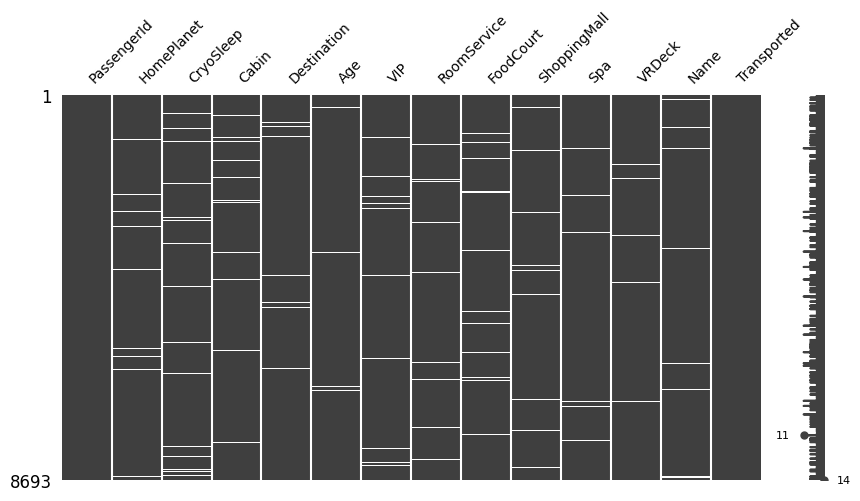

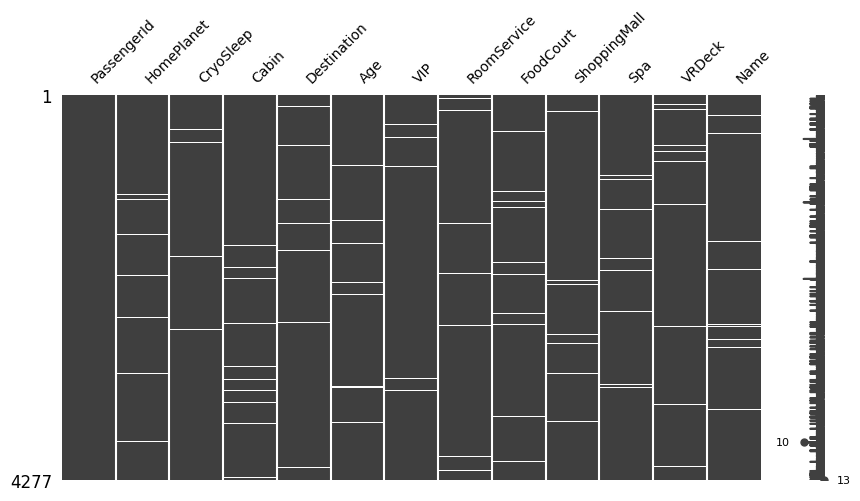

In [4]:
import missingno as msno

# show/check the missing value from the dataset
msno.matrix(train,figsize=(10,5),fontsize=10)
msno.matrix(test,figsize=(10,5),fontsize=10)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [5]:
# Obtain unique labels from the 'Transported' column in the 'train' dataset
etiquetas = train['Transported'].unique()
print(etiquetas)


[False  True]


In [6]:
PassengerID = test['PassengerId']
train = train.drop(['PassengerId','Name'], axis=1)
test = test.drop(['PassengerId','Name'], axis=1)

In [7]:
train.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [8]:
def categorical_to_numeric(attribute):
    attribute = attribute.astype('category')
    return attribute.cat.codes

# Apply the function to the specified columns in 'train'
train['HomePlanet'] = categorical_to_numeric(train['HomePlanet'])
train['CryoSleep'] = categorical_to_numeric(train['CryoSleep'])
train['Cabin'] = categorical_to_numeric(train['Cabin'])
train['Destination'] = categorical_to_numeric(train['Destination'])
train['VIP'] = categorical_to_numeric(train['VIP'])

# Apply the function to the specified columns in 'test'
test['HomePlanet'] = categorical_to_numeric(test['HomePlanet'])
test['CryoSleep'] = categorical_to_numeric(test['CryoSleep'])
test['Cabin'] = categorical_to_numeric(test['Cabin'])
test['Destination'] = categorical_to_numeric(test['Destination'])
test['VIP'] = categorical_to_numeric(test['VIP'])

# Display the first 10 rows of the transformed 'train' dataset
train.head(10)



,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True
5,0,0,2183,1,44.0,0,0.0,483.0,0.0,291.0,0.0,True
6,0,0,3425,2,26.0,0,42.0,1539.0,3.0,0.0,0.0,True
7,0,1,4559,2,28.0,0,0.0,0.0,0.0,0.0,NaN,True
8,0,0,3565,2,35.0,0,0.0,785.0,17.0,216.0,0.0,True
9,1,1,150,0,14.0,0,0.0,0.0,0.0,0.0,0.0,True


In [9]:
train.isnull().sum()


HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [11]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['RoomService'] = train['RoomService'].fillna(train['RoomService'].mean())
train['FoodCourt'] = train['FoodCourt'].fillna(train['FoodCourt'].mean())
train['ShoppingMall'] = train['ShoppingMall'].fillna(train['ShoppingMall'].mean())
train['Spa'] = train['Spa'].fillna(train['Spa'].mean())
train['VRDeck'] = train['VRDeck'].fillna(train['VRDeck'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['RoomService'] = test['RoomService'].fillna(test['RoomService'].mean())
test['FoodCourt'] = test['FoodCourt'].fillna(test['FoodCourt'].mean())
test['ShoppingMall'] = test['ShoppingMall'].fillna(test['ShoppingMall'].mean())
test['Spa'] = test['Spa'].fillna(test['Spa'].mean())
test['VRDeck'] = test['VRDeck'].fillna(test['VRDeck'].mean())

In [12]:
test.isnull().sum()


HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [13]:
def normalize_amplitude(attribute):
    return (attribute - attribute.min()) / (attribute.max() - attribute.min())

# Apply normalization to all columns except the target in 'train'
for i in range(len(train.columns)-1):  # Assuming the last column is the target
    train[train.columns[i]] = normalize_amplitude(train[train.columns[i]])

# Apply normalization to all columns in 'test'
for i in range(len(test.columns)):
    test[test.columns[i]] = normalize_amplitude(test[test.columns[i]])

# Display the transformed 'train' dataset
train.head()


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.666667,0.5,0.022866,1.0,0.493671,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,False
1,0.333333,0.5,0.333079,1.0,0.303797,0.5,0.007608,0.000302,0.001064,0.024500,0.001823,True
2,0.666667,0.5,0.000305,1.0,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,False
3,0.666667,0.5,0.000305,1.0,0.417722,0.5,0.000000,0.043035,0.015793,0.148563,0.007997,False
4,0.333333,0.5,0.333384,1.0,0.202532,0.5,0.021149,0.002348,0.006428,0.025214,0.000083,True


In [14]:
# Dividing the data
X = train.drop(['Transported'], axis=1)  # Features
Y = train['Transported']                  # Target

In [15]:
# Split the data into training and validation sets with 80% training and 20% validation
x_train, x_val, y_train, y_val = train_test_split(X, Y,random_state=77,shuffle=True,test_size=0.20)

In [16]:

# Initialize the RandomForestClassifier
RF = RandomForestClassifier(n_estimators=700, random_state=77)

# Train the model on the training set
RF.fit(x_train, y_train)

# Make predictions on the validation set
y_pred = RF.predict(x_val)

# Calculate the confusion matrix
mc = confusion_matrix(y_val, y_pred)

# Calculate the accuracy of the model
acu_rf = accuracy_score(y_val, y_pred)

# Print the accuracy
print('Accuracy: ', acu_rf)

Accuracy:  0.8085106382978723


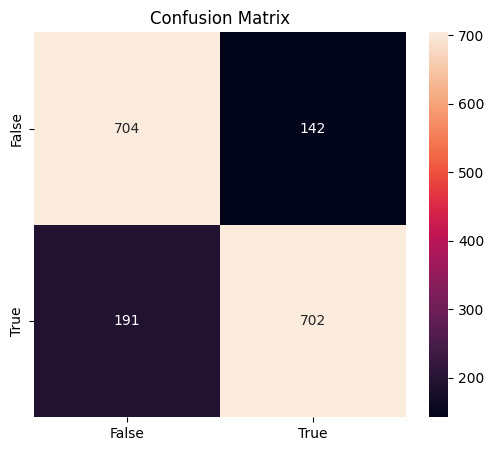

In [17]:
plt.figure(figsize=(6, 5))
plt.title('Confusion Matrix')

# Create a DataFrame from the confusion matrix 'mc', with 'etiquetas' as index and columns
sns.heatmap(pd.DataFrame(mc, index=etiquetas, columns=etiquetas), annot=True, fmt='d')

plt.show()

In [18]:
# Perform predictions on the test dataset using the trained RandomForestClassifier
prediction = RF.predict(test)

# Display the predictions
prediction

array([False, False,  True, ...,  True,  True, False])

In [21]:
# Create a new submission DataFrame
submission = pd.DataFrame()
submission['PassengerId'] = PassengerID
submission['Transported'] = prediction


# Display the first few rows of your submission to verify it matches the expected format
print(submission.head(10))

  PassengerId  Transported
0     0013_01        False
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True
5     0027_01         True
6     0029_01         True
7     0032_01         True
8     0032_02         True
9     0033_01         True
